In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
def plot_prec_rec(df, thresholded = 0, graph_title = 'Precision and recall'):
        mask= (df['thresholded?'] == thresholded)
        bins = pd.cut(df["threshold"], np.arange(0, 0.05, 0.005))

        df_by_iter = df[mask].groupby(['iter', bins]).mean()[['precision','recall']]
        to_plot = df_by_iter.groupby(['threshold']).mean()
        to_plot[['prec_std', 'rec_std']] = df_by_iter.groupby(['threshold']).std()[['precision', 'recall']]
        to_plot['x'] = pd.IntervalIndex(to_plot.index.get_level_values('threshold')).mid
        to_plot = to_plot.reset_index().drop('threshold', axis=1)
        to_plot['prec_lower'] = to_plot.precision - 1.96*to_plot.prec_std
        to_plot['prec_upper'] = to_plot.precision + 1.96*to_plot.prec_std
        to_plot['rec_lower'] = to_plot.recall - 1.96*to_plot.rec_std
        to_plot['rec_upper'] = to_plot.recall + 1.96*to_plot.rec_std

        fig, ax = plt.subplots()
        ax.scatter(to_plot.x, to_plot.precision, color = 'blue', alpha = 0.5, label="Precision")
        #ax.fill_between(to_plot.x, to_plot.prec_upper, to_plot.prec_lower, color='blue', alpha=.2)
        ax.scatter(to_plot.x, to_plot.recall, color = 'red', alpha = 0.5, label="Recall")
        #ax.fill_between(to_plot.x, to_plot.rec_upper, to_plot.rec_lower, color='red', alpha=.2)
        x_rec_thr = to_plot.x[to_plot.recall<0.95].iloc[0]
        x_prec_thr = to_plot.x[to_plot.precision>0.3].iloc[0]
        '''
        ax.vlines(x = x_rec_thr,
                color = 'r',
                ymin = to_plot.rec_lower[to_plot.x == x_rec_thr],
                ymax = to_plot.rec_upper[to_plot.x == x_rec_thr],
                linestyles='-.')

        ax.vlines(x = x_prec_thr,
                color = 'b',
                ymin = to_plot.prec_lower[to_plot.x == x_prec_thr],
                ymax = to_plot.prec_upper[to_plot.x == x_prec_thr],
                linestyles='-.')
        '''
        ax.set_title(graph_title)
        ax.legend(loc='lower right')
        print(f"Precision is above 0.3 with threshold above {100*x_prec_thr :.2f}%")
        print(f"Recall is above 0.95 with threshold below {100*x_rec_thr :.2f}%")
        print(f"Gap to bridge is  {x_prec_thr -x_rec_thr:.3f}")
        print(f"Recall at precision threshold is above {to_plot.rec_lower[to_plot.x == x_prec_thr].iloc[0]:.2f}")

In [78]:
def prec_recall_fixed_thr(df, graph_title = 'Precision and recall'):
        avgs = df.groupby(['threshold']).mean()[['precision','recall']]
        stds = df.groupby(['threshold']).std()[['precision','recall']]
        stds.columns = ['prec_std', 'rec_std']
        to_plot = pd.concat([avgs, stds], axis=1)
        to_plot['prec_lower'] = to_plot.precision - to_plot.prec_std
        to_plot['prec_upper'] = to_plot.precision + to_plot.prec_std
        to_plot['rec_lower'] = to_plot.recall - to_plot.rec_std
        to_plot['rec_upper'] = to_plot.recall + to_plot.rec_std
        to_plot['thr_percent'] = 100*to_plot.index

        fig, ax = plt.subplots()
        ax.scatter(to_plot.thr_percent, to_plot.precision, color = 'blue', alpha = 0.5, label="Precision")
        ax.fill_between(to_plot.thr_percent, to_plot.prec_upper, to_plot.prec_lower, color='blue', alpha=.2)
        ax.scatter(to_plot.thr_percent, to_plot.recall, color = 'red', alpha = 0.5, label="Recall")
        ax.fill_between(to_plot.thr_percent, to_plot.rec_upper, to_plot.rec_lower, color='red', alpha=.2)
        
        ax.set_title(graph_title)
        ax.set_xlim(left=0.05)
        ax.set_xlabel('Probability of positive, at which the image is predicted positive, %')
        ax.legend(loc='lower right')
        print(to_plot.head())

           precision    recall  prec_std   rec_std  prec_lower  prec_upper  \
threshold                                                                    
0.0000      0.079519  1.000000  0.000059  0.000000    0.079461    0.079578   
0.0005      0.280111  0.942222  0.271041  0.101044    0.009071    0.551152   
0.0010      0.330204  0.937778  0.338741  0.105877   -0.008537    0.668944   
0.0015      0.340962  0.933333  0.348697  0.115470   -0.007734    0.689659   
0.0020      0.352690  0.931111  0.360134  0.120288   -0.007444    0.712823   

           rec_lower  rec_upper  thr_percent  
threshold                                     
0.0000      1.000000   1.000000         0.00  
0.0005      0.841178   1.043266         0.05  
0.0010      0.831901   1.043654         0.10  
0.0015      0.817863   1.048803         0.15  
0.0020      0.810823   1.051399         0.20  


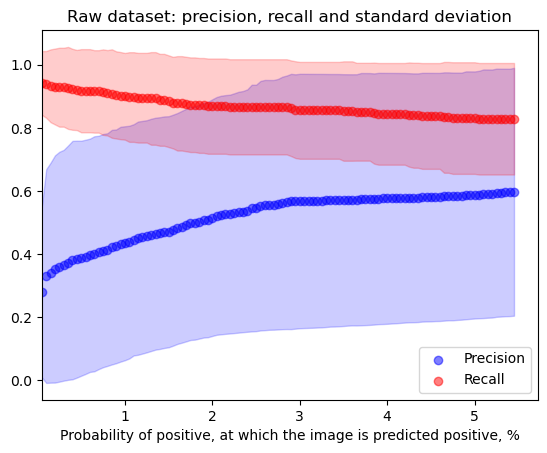

In [82]:
dfs = []
for i in range (5):
    dfs.append(pd.read_csv(f'prec_rec_baseline224_raw_{i}.csv', delimiter='\t'))
df = pd.concat(dfs, axis=0)
prec_recall_fixed_thr(df, graph_title = 'Raw dataset: precision, recall and standard deviation')

           precision    recall  prec_std   rec_std  prec_lower  prec_upper  \
threshold                                                                    
0.0000      0.079562  1.000000  0.000092  0.000000    0.079470    0.079653   
0.0005      0.316509  0.844444  0.202914  0.109149    0.113595    0.519423   
0.0010      0.362741  0.831111  0.218014  0.104350    0.144728    0.580755   
0.0015      0.387852  0.822222  0.218182  0.097816    0.169669    0.606034   
0.0020      0.411546  0.820000  0.224634  0.099815    0.186912    0.636181   

           rec_lower  rec_upper  thr_percent  
threshold                                     
0.0000      1.000000   1.000000         0.00  
0.0005      0.735295   0.953594         0.05  
0.0010      0.726761   0.935461         0.10  
0.0015      0.724407   0.920038         0.15  
0.0020      0.720185   0.919815         0.20  


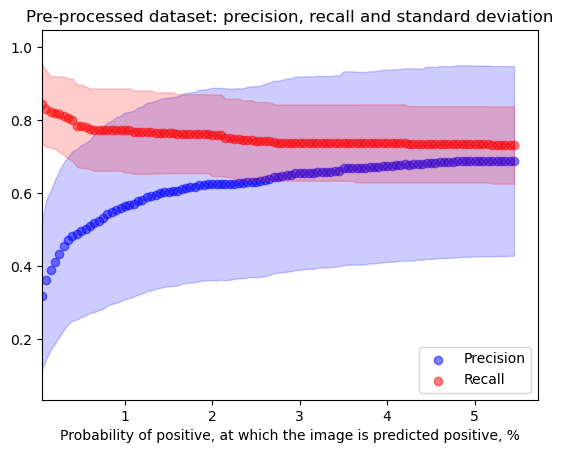

In [84]:
dfs = []
for i in range (5):
    dfs.append(pd.read_csv(f'prec_rec_baseline224_preproc_{i}.csv', delimiter='\t'))
df = pd.concat(dfs, axis=0)
prec_recall_fixed_thr(df, graph_title = 'Pre-processed dataset: precision, recall and standard deviation')

In [48]:
df

,threshold,precision,recall
0,0.0000,0.097561,0.044444
1,0.0005,NaN,0.000000
2,0.0010,NaN,0.000000
3,0.0015,NaN,0.000000
4,0.0020,NaN,0.000000
...,...,...,...
105,0.0525,NaN,0.000000
106,0.0530,NaN,0.000000
107,0.0535,NaN,0.000000
108,0.0540,NaN,0.000000
